# Multi-detector Fluxing with DEIMOS [v1]

In [1]:
%matplotlib inline

In [33]:
# imports
from importlib import reload
import os
from matplotlib import pyplot as plt
import glob
import numpy as np

from astropy.table import Table
from astropy import units as u

from pypit import arload
from pypit import arutils
from pypit import fluxspec
from pypit.core import arflux

In [3]:
# PYPIT Development
os.getenv('PYPIT_DEV')

'/home/xavier/local/Python/PYPIT-development-suite/'

# Script (user
    pypit_flux_spec sensfunc --std_file=spec1d_G191B2B_DEIMOS_2017Sep14T152432.fits  --instr=keck_deimos --sensfunc_file=sens.yaml --multi_det=3,7

----

# Development

## Load from Cooked

In [4]:
std_spec1d_file = os.getenv('PYPIT_DEV')+'Cooked/Science/spec1d_G191B2B_DEIMOS_2017Sep14T152432.fits'

In [5]:
std_specobjs, std_header = arload.load_specobj(std_spec1d_file)
std_specobjs, std_header

([<SpecObjExp: O700-S3681-D03-I0005 == Setup dum_config Object at 0.7 in Slit at 0.3681 with det=03, scidx=5 and objtype=unknown>,
  <SpecObjExp: O542-S3681-D03-I0005 == Setup dum_config Object at 0.542 in Slit at 0.3681 with det=03, scidx=5 and objtype=unknown>,
  <SpecObjExp: O462-S3681-D03-I0005 == Setup dum_config Object at 0.462 in Slit at 0.3681 with det=03, scidx=5 and objtype=unknown>,
  <SpecObjExp: O146-S3681-D03-I0005 == Setup dum_config Object at 0.146 in Slit at 0.3681 with det=03, scidx=5 and objtype=unknown>,
  <SpecObjExp: O032-S3681-D03-I0005 == Setup dum_config Object at 0.032 in Slit at 0.3681 with det=03, scidx=5 and objtype=unknown>,
  <SpecObjExp: O700-S3691-D07-I0005 == Setup dum_config Object at 0.7 in Slit at 0.3691 with det=07, scidx=5 and objtype=unknown>,
  <SpecObjExp: O462-S3691-D07-I0005 == Setup dum_config Object at 0.462 in Slit at 0.3691 with det=07, scidx=5 and objtype=unknown>,
  <SpecObjExp: O587-S3691-D07-I0005 == Setup dum_config Object at 0.587 i

In [44]:
reload(fluxspec)
FxSpec = fluxspec.FluxSpec(spectrograph='keck_deimos', std_specobjs=std_specobjs, std_header=std_header, multi_det=(3,7))

[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.baseargflag
[INFO]    :: arparse.py 1393 run_ncpus() - Setting 7 CPUs
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default settings


### Find the standards and splice

In [46]:
FxSpec.find_standard()

[INFO]    :: arflux.py 429 find_standard() - Putative standard star has a median boxcar count of 18286.36869975645
[INFO]    :: fluxspec.py 173 find_standard() - Using standard <SpecObjExp: O700-S3681-D03-I0005 == Setup dum_config Object at 0.7 in Slit at 0.3681 with det=03, scidx=5 and objtype=unknown> in det=3
[INFO]    :: arflux.py 429 find_standard() - Putative standard star has a median boxcar count of 6693.603640276046
[INFO]    :: fluxspec.py 173 find_standard() - Using standard <SpecObjExp: O700-S3691-D07-I0005 == Setup dum_config Object at 0.7 in Slit at 0.3691 with det=07, scidx=5 and objtype=unknown> in det=7
[INFO]    :: fluxspec.py 175 find_standard() - Splicing the standards


### Sensfunc

In [48]:
_ = FxSpec.generate_sensfunc()

[INFO]    :: arflux.py 370 load_extinction_data() - Using mthamextinct.dat for extinction corrections.
[INFO]    :: arflux.py 300 find_standard_file() - Using standard star G191B2B
[INFO]    :: arflux.py 406 load_standard_file() - Loading standard star file: /home/xavier/local/Python/PYPIT/pypit/data/standards/calspec/g191b2b_mod_005.fits.gz
[INFO]    :: arflux.py 407 load_standard_file() - Fluxes are flambda, normalized to 1e-17
[INFO]    :: arflux.py 494 generate_sensfunc() - Masking edges
[WARNING] :: arflux.py 500 generate_sensfunc() - Should pull resolution from arc line analysis
[INFO]    :: arflux.py 504 generate_sensfunc() - Masking Balmer
[INFO]    :: arflux.py 512 generate_sensfunc() - Masking Telluric
[INFO]    :: arflux.py 519 generate_sensfunc() - Masking Below the atmospheric cutoff
[INFO]    :: arflux.py 203 bspline_magfit() - Difference between fits is 0.00020576
[WORK IN ]::
[PROGRESS]:: arflux.py 206 bspline_magfit() - Add QA for sensitivity function


### Show

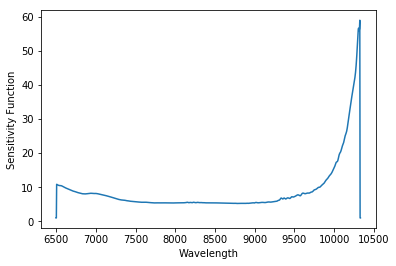

In [49]:
FxSpec.show_sensfunc()

----

## Generate two FluxSpec objects

In [6]:
reload(fluxspec)
std3 = [sobj for sobj in std_specobjs if sobj.det==3]
FxSpec3 = fluxspec.FluxSpec(spectrograph='keck_deimos', std_specobjs=std3, std_header=std_header)

[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.baseargflag
[INFO]    :: arparse.py 1393 run_ncpus() - Setting 7 CPUs
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default settings


In [7]:
std7 = [sobj for sobj in std_specobjs if sobj.det==7]
FxSpec7 = fluxspec.FluxSpec(spectrograph='keck_deimos', std_specobjs=std7, std_header=std_header)

[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.baseargflag
[INFO]    :: arparse.py 1393 run_ncpus() - Setting 7 CPUs
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default settings


### Find the standards in each

In [8]:
FxSpec3.find_standard()
FxSpec7.find_standard()
FxSpec3.std, FxSpec7.std

[INFO]    :: arflux.py 429 find_standard() - Putative standard star has a median boxcar count of 18286.36869975645
[INFO]    :: arflux.py 429 find_standard() - Putative standard star has a median boxcar count of 6693.603640276046


(<SpecObjExp: O700-S3681-D03-I0005 == Setup dum_config Object at 0.7 in Slit at 0.3681 with det=03, scidx=5 and objtype=unknown>,
 <SpecObjExp: O700-S3691-D07-I0005 == Setup dum_config Object at 0.7 in Slit at 0.3691 with det=07, scidx=5 and objtype=unknown>)

### Sensitivity functions

In [9]:
_ = FxSpec3.generate_sensfunc()
_ = FxSpec7.generate_sensfunc()

[INFO]    :: arflux.py 370 load_extinction_data() - Using mthamextinct.dat for extinction corrections.
[INFO]    :: arflux.py 300 find_standard_file() - Using standard star G191B2B
[INFO]    :: arflux.py 406 load_standard_file() - Loading standard star file: /home/xavier/local/Python/PYPIT/pypit/data/standards/calspec/g191b2b_mod_005.fits.gz
[INFO]    :: arflux.py 407 load_standard_file() - Fluxes are flambda, normalized to 1e-17
[INFO]    :: arflux.py 494 generate_sensfunc() - Masking edges
[WARNING] :: arflux.py 500 generate_sensfunc() - Should pull resolution from arc line analysis
[INFO]    :: arflux.py 504 generate_sensfunc() - Masking Balmer
[INFO]    :: arflux.py 512 generate_sensfunc() - Masking Telluric
[INFO]    :: arflux.py 519 generate_sensfunc() - Masking Below the atmospheric cutoff
[INFO]    :: arflux.py 203 bspline_magfit() - Difference between fits is 0.000120563
[WORK IN ]::
[PROGRESS]:: arflux.py 206 bspline_magfit() - Add QA for sensitivity function
[INFO]    :: arf

### Show

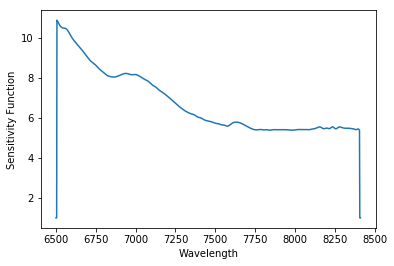

In [10]:
FxSpec3.show_sensfunc()

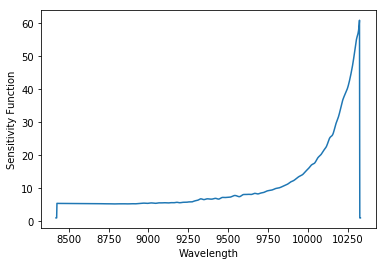

In [11]:
FxSpec7.show_sensfunc()

### Together

In [12]:
wave3 = np.linspace(FxSpec3.sensfunc['wave_min'], FxSpec3.sensfunc['wave_max'], 1000)
mag_func3 = arutils.func_val(FxSpec3.sensfunc['c'], wave3, FxSpec3.sensfunc['func'])
sens3 = 10.0**(0.4*mag_func3)

In [13]:
wave7 = np.linspace(FxSpec7.sensfunc['wave_min'], FxSpec7.sensfunc['wave_max'], 1000)
mag_func7 = arutils.func_val(FxSpec7.sensfunc['c'], wave7, FxSpec7.sensfunc['func'])
sens7 = 10.0**(0.4*mag_func7)

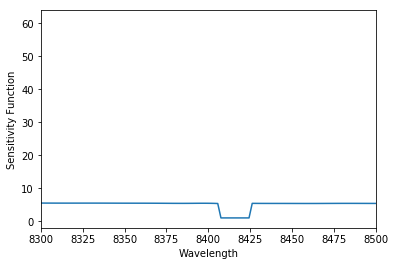

In [14]:
plt.clf()
ax = plt.gca()
ax.plot(np.concatenate([wave3,wave7]), np.concatenate([sens3,sens7]))
ax.set_xlim(8300., 8500.)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Sensitivity Function')
plt.show()

## Try a splice

In [31]:
std_splice = FxSpec3.std.copy()
# Append
std_splice.boxcar['wave'] = np.append(std_splice.boxcar['wave'].value, FxSpec7.std.boxcar['wave'].value)*u.AA
for key in ['counts', 'var']:
    std_splice.boxcar[key] = np.append(std_splice.boxcar[key], FxSpec7.std.boxcar[key])

In [34]:
sensfunc = arflux.generate_sensfunc(std_splice, FxSpec3.std_header['RA'],
                                            FxSpec3.std_header['DEC'], FxSpec3.std_header['AIRMASS'],
                                            FxSpec3.std_header['EXPTIME'], FxSpec3.settings)

[INFO]    :: arflux.py 370 load_extinction_data() - Using mthamextinct.dat for extinction corrections.
[INFO]    :: arflux.py 300 find_standard_file() - Using standard star G191B2B
[INFO]    :: arflux.py 406 load_standard_file() - Loading standard star file: /home/xavier/local/Python/PYPIT/pypit/data/standards/calspec/g191b2b_mod_005.fits.gz
[INFO]    :: arflux.py 407 load_standard_file() - Fluxes are flambda, normalized to 1e-17
[INFO]    :: arflux.py 494 generate_sensfunc() - Masking edges
[WARNING] :: arflux.py 500 generate_sensfunc() - Should pull resolution from arc line analysis
[INFO]    :: arflux.py 504 generate_sensfunc() - Masking Balmer
[INFO]    :: arflux.py 512 generate_sensfunc() - Masking Telluric
[INFO]    :: arflux.py 519 generate_sensfunc() - Masking Below the atmospheric cutoff
[INFO]    :: arflux.py 203 bspline_magfit() - Difference between fits is 0.00020576
[WORK IN ]::
[PROGRESS]:: arflux.py 206 bspline_magfit() - Add QA for sensitivity function


In [36]:
sensfunc['wave_min'], sensfunc['wave_max']

(<Quantity 6499.8059110514305 Angstrom>,
 <Quantity 10329.396588147156 Angstrom>)

In [38]:
FxSpec = fluxspec.FluxSpec(spectrograph='keck_deimos')
FxSpec.sensfunc = sensfunc

[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.baseargflag
[INFO]    :: arparse.py 1393 run_ncpus() - Setting 7 CPUs
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 75 load_file() - Loading default settings
[INFO]    :: arparse.py 87 load_file() - Loading base settings from settings.basespect
[INFO]    :: arparse.py 75 load_file() - Loading default settings


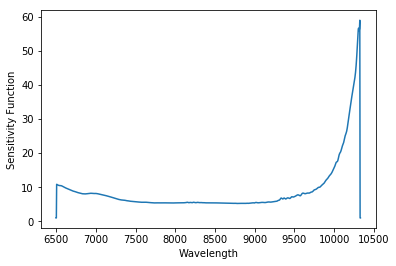

In [39]:
FxSpec.show_sensfunc()

In [40]:
FxSpec.save_master('tmp.yaml')

[INFO]    :: fluxspec.py 345 save_master() - Wrote sensfunc to MasterFrame: tmp.yaml
